In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countryregion-list/country-region_list.txt
/kaggle/input/military-presence-worldwide/Military Data .xlsx


In [11]:
!pip install openpyxl #supports pd.read_excel and .xlsx format

     |████████████████████████████████| 243 kB 865 kB/s eta 0:00:01


In [29]:
military_filepath = "../input/military-presence-worldwide/Military Data .xlsx"
military_data = pd.read_excel (military_filepath)
military_data['Country '] = military_data['Country '].str.strip() #remove trailing whitespace
del military_data['Unnamed: 7'] #some spurious column to be removed
display(military_data.head())
print("Number of countries:", military_data.shape[0])

,Country,Active military,Reserve military,Paramilitary,Total,Per 1000 capita (total),Per 1000 capita (active)
0,Afghanistan,171200.0,0.0,148200.0,319400,9.6,5.1
1,Albania,8000.0,0.0,500.0,8500,2.8,2.6
2,Algeria,130000.0,150000.0,187200.0,467200,11.6,3.2
3,Angola,107000.0,0.0,10000.0,117000,5.8,5.3
4,Antigua and Barbuda,180.0,80.0,0.0,260,2.8,1.9


Number of countries: 172


In [30]:
largest_total = military_data.sort_values(by='Total', ascending=False).reset_index()
largest_active = military_data.sort_values(by='Active military', ascending=False).reset_index()

display(largest_total.columns) #notice that Country has a space!
display(largest_total.loc[:5, ['Country ', 'Total']])
display(largest_active.loc[:5, ['Country ','Active military']])

Index(['index', 'Country ', 'Active military', 'Reserve military',
       'Paramilitary', 'Total', 'Per 1000 capita (total)',
       'Per 1000 capita (active)'],
      dtype='object')

,Country,Total
0,South Korea,8134500
1,North Korea,7679000
2,Vietnam,5522000
3,India,4941600
4,Russia,4223000
5,People's Republic of China,3353000


,Country,Active military
0,People's Republic of China,2183000.0
1,India,1395100.0
2,United States of America,1347300.0
3,North Korea,1190000.0
4,Russia,1013000.0
5,Pakistan,653800.0


In [31]:
#data originated from https://www.nationsonline.org/oneworld/countries_of_the_world.htm
#1) data was placed in country_list.txt
#2) country_list.txt was parsed by country_region_parser.py 
#3) output was stored ("pickled") in country-region_list.txt
import pickle

with open ('../input/countryregion-list/country-region_list.txt', 'rb') as f:
    country_region_pairs = pickle.load(f)
print(country_region_pairs[:5])
country_region_dict = dict(country_region_pairs)

[('Afghanistan', 'South-Central Asia'), ('Albania', 'Balkan Peninsula'), ('Algeria', 'Northern Africa'), ('American Samoa', 'Polynesia, Oceania'), ('Andorra', 'Southern Europe')]


In [32]:

regions = []
missing = []
missed_country = ['The Bahamas', 'Kingdom of Belgium', 'Brunei', "People's Republic of China",
                  'Democratic Republic of the Congo', 'Republic of Fiji', 'Iran',
                  'Republic of Kosovo', 'Laos', 'Moldova', 'Myanmar', 'North Korea',
                  'Kingdom of Norway', 'State of Palestine', 'Macedonia',
                  'Republic of the Congo', 'Russia', 'Republic of Singapore', 'Slovakia',
                  'Republic of South Africa', 'South Korea', 'Kingdom of Spain', 'Syria',
                  'Taiwan', 'Tanzania', 'East Timor',
                  'United Kingdom of Great Britain and Northern Ireland',
                  'United States of America'] 
#determined 'after the fact' (by running below once and finding names of the same countries don't match)

missed_region = ['Caribbean', 'Western Europe', 'Southeast Asia', 'Eastern Asia',
                'Central Africa', 'Melanesia, Oceania', 'South-Central Asia',
                'Southern Europe', 'South-East Asia', 'Eastern Europe', 'Southeast Asia', 'Eastern Asia',
                'Northern Europe', 'Middle East, Western Asia', 'Southern Europe',
                'Central Africa', 'Eastern Europe - Northern Asia', 'Southeast Asia', 'Eastern Europe',
                'Southern Africa', 'Eastern Asia', 'Southern Europe', 'Middle East, Western Asia',
                'Eastern Asia', 'Eastern Africa', 'South-East Asia', 
                'Northern Europe',
                 'North America'] 
#these were determined manually by either noticing the difference in spelling of the same countries
#(and hence copying the region from the output of country-region_parser.py OR
#inferring the region from neighboring countries mentioned in output of country-region_parser.py)

missed_country_region_pairs = zip(missed_country, missed_region)
missed_country_region_dict = dict(missed_country_region_pairs)

for index, row in military_data.iterrows(): 
    #print("Total income in "+ row["Date"]+ " is:"+str(row["Income_1"]+row["Income_2"]))
    if row['Country '] in country_region_dict:
        regions.append(country_region_dict[row['Country ']])
    elif row['Country '] in missed_country_region_dict:
        regions.append(missed_country_region_dict[row['Country ']])
    else:
        missing.append(row['Country '])
        
print("Number of matches:", len(regions))
print("Number of misses:", len(missing)) #0, as expected after correcting for it by creating missed_country_region_dict
print(missing) #empty, as expected

military_data['Region'] = regions
display(military_data)

Number of matches: 172
Number of misses: 0
[]


,Country,Active military,Reserve military,Paramilitary,Total,Per 1000 capita (total),Per 1000 capita (active),Region
0,Afghanistan,171200.0,0.0,148200.0,319400,9.6,5.1,South-Central Asia
1,Albania,8000.0,0.0,500.0,8500,2.8,2.6,Balkan Peninsula
2,Algeria,130000.0,150000.0,187200.0,467200,11.6,3.2,Northern Africa
3,Angola,107000.0,0.0,10000.0,117000,5.8,5.3,Central Africa
4,Antigua and Barbuda,180.0,80.0,0.0,260,2.8,1.9,"Leeward Islands, Caribbean"
...,...,...,...,...,...,...,...,...
167,Venezuela,115000.0,8000.0,0.0,123000,4.0,3.7,Northern South America
168,Vietnam,482000.0,5000000.0,40000.0,5522000,58.0,5.1,South-East Asia
169,Yemen,20000.0,0.0,0.0,20000,0.7,0.7,"Arabian Peninsula, Middle East"
170,Zambia,15100.0,3000.0,1400.0,19500,1.3,1.0,Eastern Africa


Region
Africa, Middle East                  1
Arabian Peninsula, Middle East       5
Australia/Oceania                    1
Balkan Peninsula                     1
Balkan Peninsula, Southern Europe    1
Name: Region, dtype: int64

Text(0, 0.5, 'Total size')

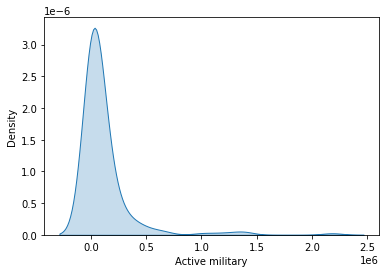

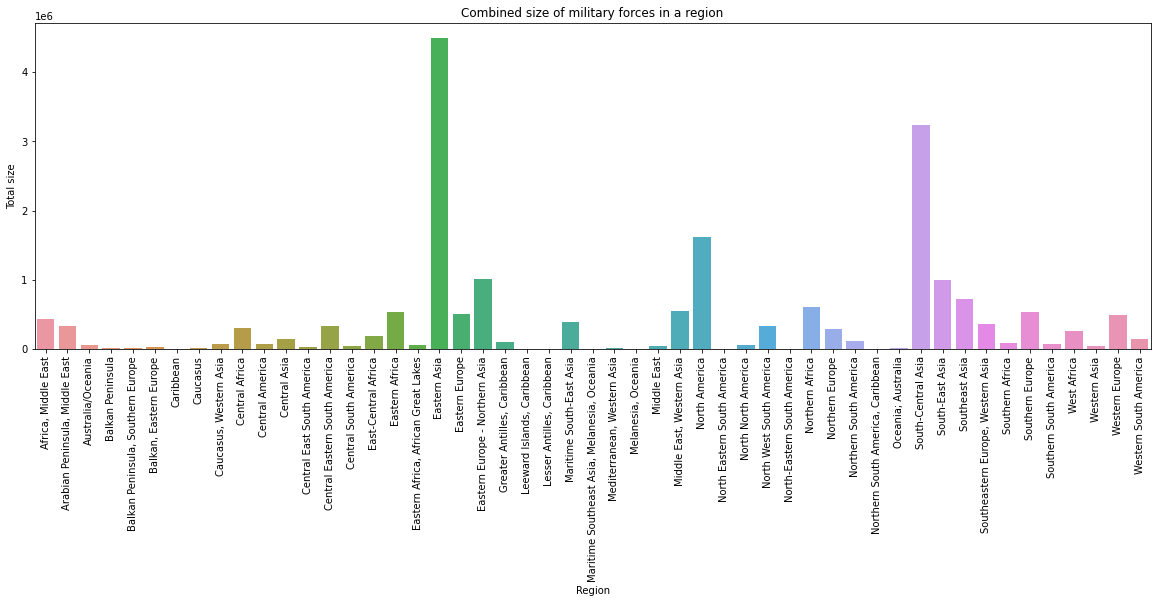

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

military_region_data = military_data.groupby('Region')
display(military_region_data.Region.count().iloc[:5])
sns.kdeplot(data=military_data['Active military'], shade=True)

#military_presence = military_region_data['Active military'].sum()
military_presence = military_region_data['Active military'].agg([sum]).reset_index() #allows Region to become its own column
                                                                                     #(not the index (which isn't a column by default) anymore)
military_presence.columns = [
  'Region',
  'Total active'
]
#display(military_presence)
military_presence.shape
plt.figure(figsize=(20,6)) #how many active military personnel in a region?
plt.title("Combined size of military forces in a region")
mp = sns.barplot(x=military_presence['Region'], y=military_presence['Total active'])
for item in mp.get_xticklabels():
    item.set_rotation(90)
plt.ylabel("Total size")